# Titanic Dataset

O conjunto de dados de teste conta com as seguintes variáveis: PassenderId: Passenger ID, Survived: Passnager Survival Indicator, Pclass: Passenger Class, Name: Name, Sex: Sex, Age: Age, SibSp: Number of Siblings/Spouses Aboard, Parch: Number of Parents/Children Aboard, Ticket: Ticket Number, Fare: Passenger Fare, Cabin: Cabin and Embarked: Port of Embarkation. 
Entretanto, vamos considerar as variáveis Survived, Pclass, Sex, Age, SibSp, Parch e Embarked.

## Carregando o pacote titanic

Vamos carregar o conjunto de dados por meio da biblioteca **titanic**.

In [1]:
#install.packages('titanic')
library('titanic')

Warning message:
"package 'titanic' was built under R version 3.6.3"

In [26]:
#install.packages('knitr', dependencies = TRUE)
titanic_df <- subset(titanic_train, select = c('Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked'))
#knitr::kable(head(titanic_df))
head(titanic_df)

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22,1,0,7.2500,S
1,1,female,38,1,0,71.2833,C
1,3,female,26,0,0,7.9250,S
1,1,female,35,1,0,53.1000,S
0,3,male,35,0,0,8.0500,S
0,3,male,NA,0,0,8.4583,Q


O conjunto de dados de treino conta com 891 observações e o conjunto de teste com 418 observações.

In [14]:
dim(titanic_df)

[1] 891   8

In [15]:
str(titanic_df)

'data.frame':	891 obs. of  8 variables:
 $ Survived: int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass  : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : chr  "male" "female" "female" "female" ...
 $ Age     : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: chr  "S" "C" "S" "S" ...


In [3]:
na_sum <- apply(X = titanic_df, MARGIN = 2, FUN = function(x) sum(is.na(x)))
t(na_sum)              

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,177,0,0,0,0


Vamos remover as observações com valores faltantes e considerar apenas as demais observações.

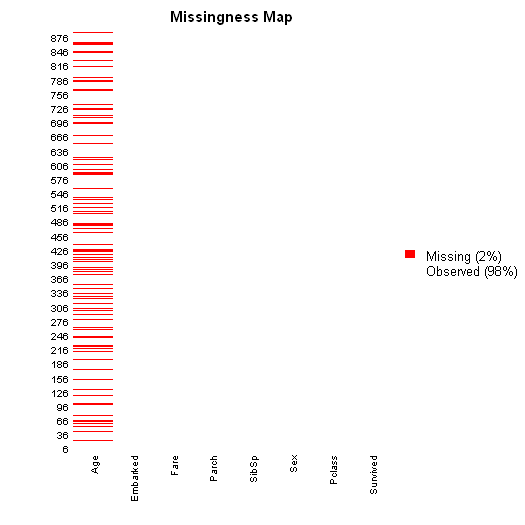

In [28]:
options(repr.plot.res = 75)
library(Amelia)
missmap(titanic_df, col=c('red', 'white'))

In [29]:
titanic_df <- na.omit(titanic_df)
head(titanic_df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,0,3,male,22,1,0,7.2500,S
2,1,1,female,38,1,0,71.2833,C
3,1,3,female,26,0,0,7.9250,S
4,1,1,female,35,1,0,53.1000,S
5,0,3,male,35,0,0,8.0500,S
7,0,1,male,54,0,0,51.8625,S


Agora, o conjunto de dados conta com 714 observações.

In [9]:
nrow(titanic_df)

[1] 714

### Vizualização dos dados

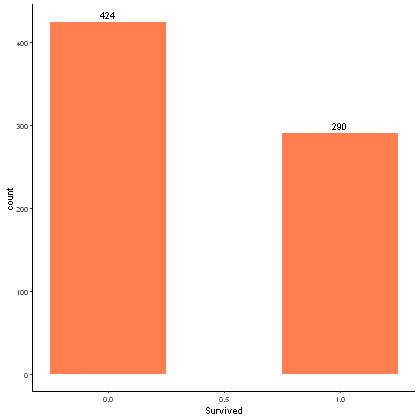

In [7]:
options(repr.plot.res = 60)
library(ggplot2)
ggplot(titanic_df, aes(x = Survived)) +
  geom_bar(width=0.5, fill = "coral") +
  geom_text(stat='count', aes(label=stat(count)), vjust=-0.5) +
  theme_classic()

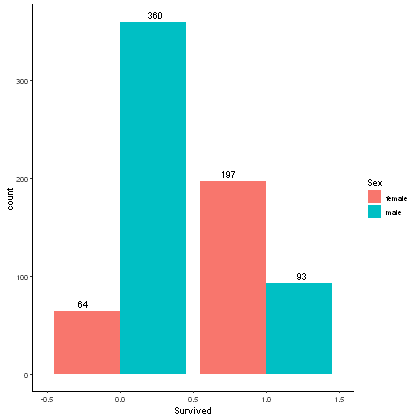

In [21]:
options(repr.plot.res = 60)
ggplot(titanic_df, aes(x = Survived, fill=Sex)) +
 geom_bar(position = position_dodge()) +
 geom_text(stat='count', 
           aes(label=stat(count)), 
           position = position_dodge(width=1), vjust=-0.5)+
 theme_classic()

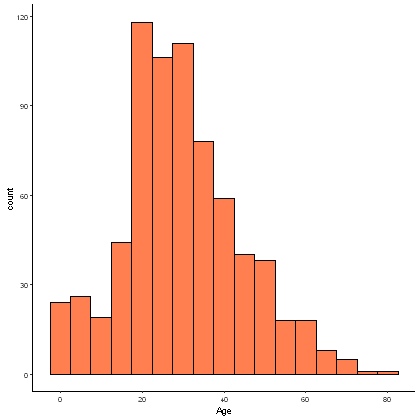

In [33]:
options(repr.plot.res = 60)
ggplot(titanic_df, aes(x = Age)) +
 geom_histogram(color="black", fill="coral", binwidth = 5) +
 theme_classic()

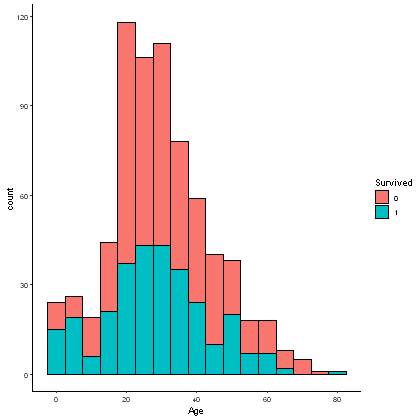

In [35]:
options(repr.plot.res = 60)
ggplot(titanic_df, aes(x = Age, fill = Survived)) +
 geom_histogram(color="black", binwidth = 5) +
 theme_classic()

In [18]:
titanic_df$Survived <- factor(titanic_df$Survived)
titanic_df$Pclass <- factor(titanic_df$Pclass, order=TRUE, levels = c(3, 2, 1))
#titanic_df$SibSp <- factor(titanic_df$SibSp)
#titanic_df$Parch <- factor(titanic_df$Parch)

### Diagrama de correlação

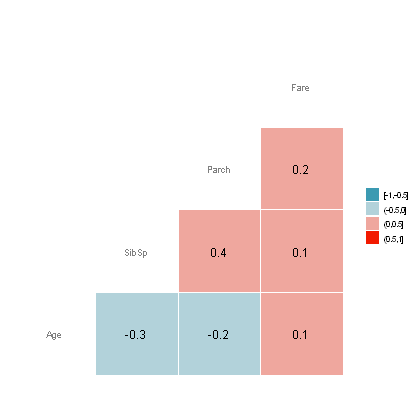

In [59]:
#install.packages('GGally')
library(GGally)

options(repr.plot.res = 60, warn = -1)
ggcorr(titanic_df,
       nbreaks = 4,
       label = TRUE,
       label_size = 5,
       color = 'grey50')

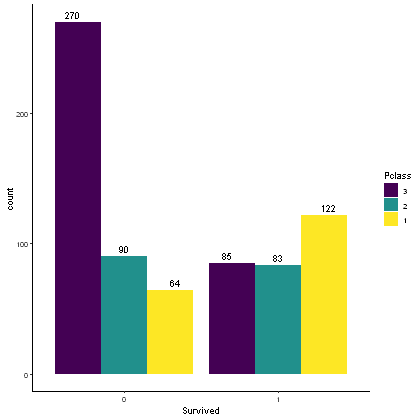

In [63]:
options(repr.plot.res = 60, warn = 0)
ggplot(titanic_df, aes(x = Survived, fill=Pclass)) +
 geom_bar(position = position_dodge()) +
 geom_text(stat='count', 
           aes(label=stat(count)), 
           position = position_dodge(width=1), 
           vjust=-0.5)+
 theme_classic()

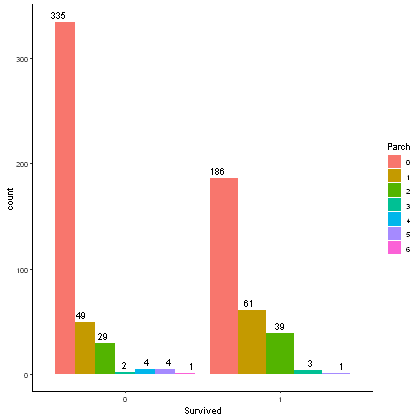

In [21]:
options(repr.plot.res = 60, warn = 0)
ggplot(titanic_df, aes(x = Survived, fill = Parch)) +
 geom_bar(position = position_dodge()) +
 geom_text(stat='count', 
           aes(label=stat(count)), 
           position = position_dodge(width=1), 
           vjust=-0.5)+
 theme_classic()

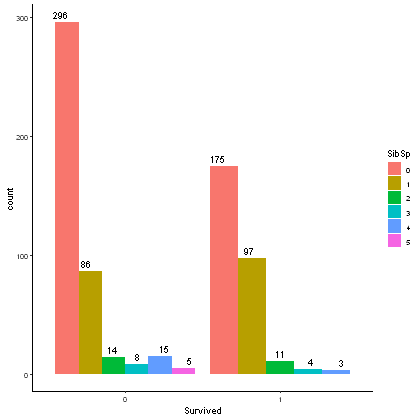

In [22]:
ggplot(titanic_df, aes(x = Survived, fill = SibSp)) +
 geom_bar(position = position_dodge()) +
 geom_text(stat='count', 
           aes(label=stat(count)), 
           position = position_dodge(width=1), 
           vjust=-0.5)+
 theme_classic()

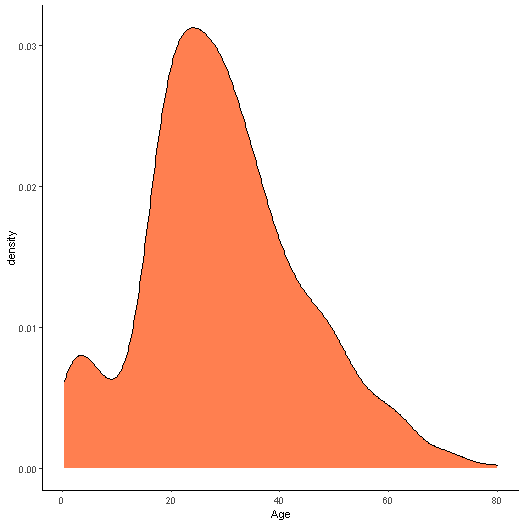

In [23]:
options(repr.plot.res = 75, warn = 0)
ggplot(titanic_df, aes(x = Age)) +
 geom_density(fill='coral') +
theme_classic()

## Separando o conjunto de dados de treinamento e teste

Vamos dividir o conjunto de dados considerando 75% para o treinamento e os 25% restantes para o teste.

In [53]:
n_train <- floor(nrow(titanic_df) * 0.75)
set.seed(27012022)
smp_obs <- sample(x = nrow(titanic_df), size = n_train, replace = F)
train <- titanic_df[smp_obs,]
test <- titanic_df[-smp_obs,]

In [55]:
nrow(train) # conjunto de treinamento

[1] 535

In [54]:
nrow(test) # conjunto de teste

[1] 179

### Árvores de decisão

In [123]:
#install.packages('rpart')
#install.packages('rpart.plot')
library(rpart) # carregando biblioteca
library(rpart.plot)

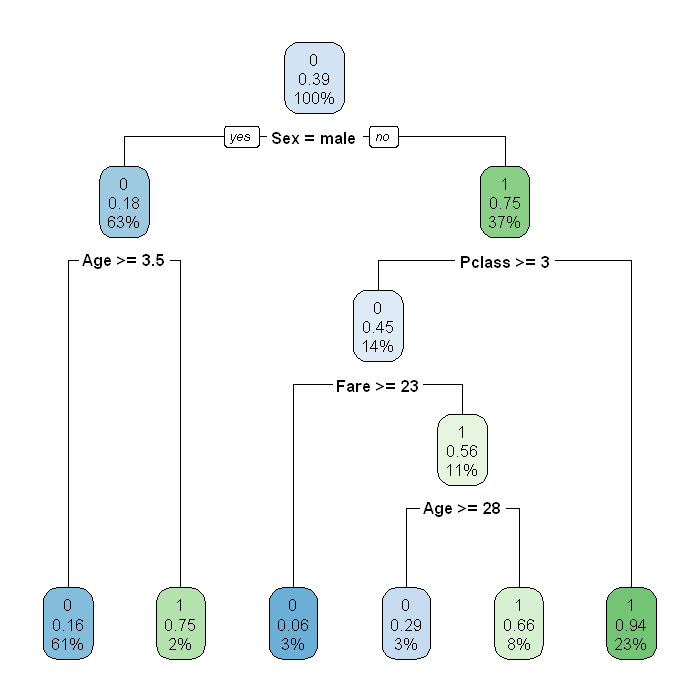

In [124]:
fit_tree <- rpart(Survived~., data = train, method = 'class')

options(repr.plot.res = 100, warn = 0)
rpart.plot(fit_tree, extra = 106)

In [125]:
library(caret) # carregando biblioteca

In [126]:
previsoes <- predict(object = fit_tree, newdata = test, type = 'class')

In [128]:
confusionMatrix(data = factor(test$Survived), reference = previsoes, positive = '1')

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 88 12
         1 31 48
                                          
               Accuracy : 0.7598          
                 95% CI : (0.6904, 0.8204)
    No Information Rate : 0.6648          
    P-Value [Acc > NIR] : 0.003736        
                                          
                  Kappa : 0.5002          
                                          
 Mcnemar's Test P-Value : 0.006052        
                                          
            Sensitivity : 0.8000          
            Specificity : 0.7395          
         Pos Pred Value : 0.6076          
         Neg Pred Value : 0.8800          
             Prevalence : 0.3352          
         Detection Rate : 0.2682          
   Detection Prevalence : 0.4413          
      Balanced Accuracy : 0.7697          
                                          
       'Positive' Class : 1               
                                    

In [129]:
control = rpart.control(minsplit = 8,
                         minbucket = 2,
                         maxdepth = 6,
                         cp = 0)
tuned_fit = rpart(Survived ~ ., data = train, method = 'class', control = control)
dt_predict = predict(tuned_fit, test, type = 'class')

In [130]:
confusionMatrix(reference = factor(test$Survived), data = dt_predict, positive = '1')

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 91 32
         1  9 47
                                          
               Accuracy : 0.7709          
                 95% CI : (0.7024, 0.8303)
    No Information Rate : 0.5587          
    P-Value [Acc > NIR] : 2.653e-09       
                                          
                  Kappa : 0.5209          
                                          
 Mcnemar's Test P-Value : 0.0005908       
                                          
            Sensitivity : 0.5949          
            Specificity : 0.9100          
         Pos Pred Value : 0.8393          
         Neg Pred Value : 0.7398          
             Prevalence : 0.4413          
         Detection Rate : 0.2626          
   Detection Prevalence : 0.3128          
      Balanced Accuracy : 0.7525          
                                          
       'Positive' Class : 1               
                                    

### Regressão logística

In [61]:
fit_glm <- glm(Survived ~ ., data = train, family = binomial(link = 'logit'))
summary(fit_glm)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7144  -0.5910  -0.3638   0.5675   2.5050  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  18.115920 606.323181   0.030   0.9762    
Pclass       -1.272750   0.197514  -6.444 1.16e-10 ***
Sexmale      -2.820962   0.269040 -10.485  < 2e-16 ***
Age          -0.045685   0.009712  -4.704 2.55e-06 ***
SibSp        -0.304747   0.148607  -2.051   0.0403 *  
Parch        -0.220100   0.152307  -1.445   0.1484    
Fare          0.001155   0.003145   0.367   0.7135    
EmbarkedC   -12.239797 606.322855  -0.020   0.9839    
EmbarkedQ   -13.262745 606.323176  -0.022   0.9825    
EmbarkedS   -12.523236 606.322825  -0.021   0.9835    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 717.62  on 534  degrees of freed

In [63]:
library(MASS) # carregando biblioteca MASS
stepAIC(fit_glm) # seleção das covariáveis que vão compor o modelo (via AIC)

Start:  AIC=471.35
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked

           Df Deviance    AIC
- Embarked  3   453.86 467.86
- Fare      1   451.48 469.48
<none>          451.35 471.35
- Parch     1   453.58 471.58
- SibSp     1   455.79 473.79
- Age       1   475.77 493.77
- Pclass    1   494.52 512.52
- Sex       1   592.30 610.30

Step:  AIC=467.86
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare

         Df Deviance    AIC
- Fare    1   454.17 466.17
<none>        453.86 467.86
- Parch   1   456.16 468.16
- SibSp   1   458.79 470.79
- Age     1   478.26 490.26
- Pclass  1   499.96 511.96
- Sex     1   597.91 609.91

Step:  AIC=466.17
Survived ~ Pclass + Sex + Age + SibSp + Parch

         Df Deviance    AIC
<none>        454.17 466.17
- Parch   1   456.19 466.19
- SibSp   1   458.87 468.87
- Age     1   479.34 489.34
- Pclass  1   534.66 544.66
- Sex     1   598.88 608.88



Call:  glm(formula = Survived ~ Pclass + Sex + Age + SibSp + Parch, 
    family = binomial(link = "logit"), data = train)

Coefficients:
(Intercept)       Pclass      Sexmale          Age        SibSp        Parch  
    5.84018     -1.36299     -2.80884     -0.04581     -0.30426     -0.20001  

Degrees of Freedom: 534 Total (i.e. Null);  529 Residual
Null Deviance:	    717.6 
Residual Deviance: 454.2 	AIC: 466.2

In [131]:
fit_glm <- glm(formula = Survived ~ Pclass + Sex + Age + SibSp + Parch, 
    family = binomial(link = "logit"), data = train)
summary(fit_glm)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp + Parch, 
    family = binomial(link = "logit"), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7226  -0.6108  -0.3675   0.5725   2.5149  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.840184   0.647670   9.017  < 2e-16 ***
Pclass      -1.362990   0.167302  -8.147 3.73e-16 ***
Sexmale     -2.808840   0.263721 -10.651  < 2e-16 ***
Age         -0.045812   0.009595  -4.774 1.80e-06 ***
SibSp       -0.304256   0.144444  -2.106   0.0352 *  
Parch       -0.200007   0.144829  -1.381   0.1673    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 717.62  on 534  degrees of freedom
Residual deviance: 454.17  on 529  degrees of freedom
AIC: 466.17

Number of Fisher Scoring iterations: 5


Setting levels: control = 0, case = 1
Setting direction: controls < cases


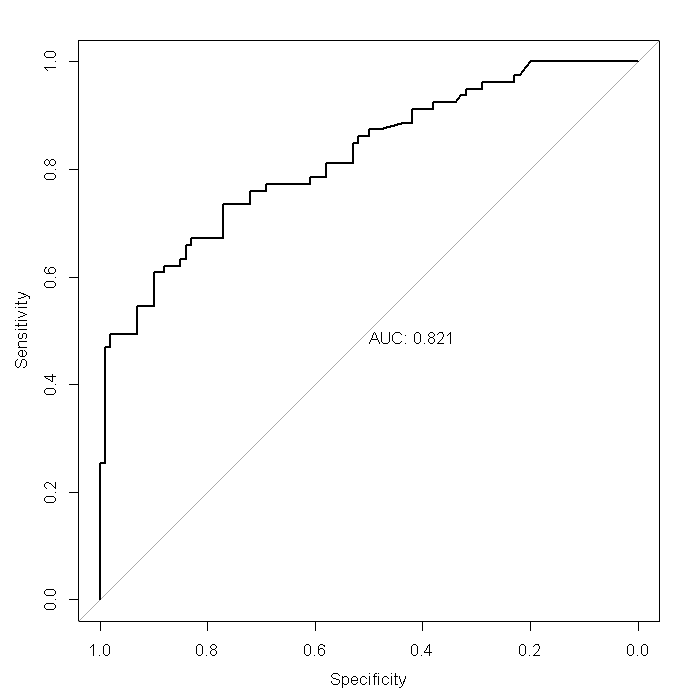

In [132]:
library(pROC)
previsoes <- predict(object = fit_glm, newdata = test, type = 'response')
test_roc = roc(test$Survived ~ previsoes, plot = TRUE, print.auc = TRUE)

In [140]:
test_roc$auc

Area under the curve: 0.8213

In [184]:
previsoes <- predict(object = fit_glm, newdata = test, type = 'response')
(cuts <- seq(0.05,0.95,0.05))

[1] 0.05 0.10 0.15 0.20 0.25 0.30 0.35 0.40 0.45 0.50 0.55 0.60 0.65 0.70 0.75
[16] 0.80 0.85 0.90 0.95

In [190]:
for (i in cuts){
    previsoes <- predict(object = fit_glm, newdata = test, type = 'response')
    previsoes <- ifelse(previsoes > i, 1, 0)
    print(i); print(confusionMatrix(data = factor(previsoes), reference = factor(test$Survived), positive = '1')$overall[1])
}

[1] 0.05
 Accuracy 
0.4972067 
[1] 0.1
 Accuracy 
0.6145251 
[1] 0.15
 Accuracy 
0.6648045 
[1] 0.2
 Accuracy 
0.6648045 
[1] 0.25
 Accuracy 
0.6815642 
[1] 0.3
 Accuracy 
0.7206704 
[1] 0.35
 Accuracy 
0.7318436 
[1] 0.4
 Accuracy 
0.7541899 
[1] 0.45
 Accuracy 
0.7318436 
[1] 0.5
 Accuracy 
0.7541899 
[1] 0.55
 Accuracy 
0.7486034 
[1] 0.6
 Accuracy 
0.7653631 
[1] 0.65
 Accuracy 
0.7430168 
[1] 0.7
 Accuracy 
0.7653631 
[1] 0.75
 Accuracy 
0.7430168 
[1] 0.8
Accuracy 
0.726257 
[1] 0.85
 Accuracy 
0.6815642 
[1] 0.9
 Accuracy 
0.6536313 
[1] 0.95
 Accuracy 
0.5865922 


In [191]:
previsoes <- predict(object = fit_glm, newdata = test, type = 'response')
previsoes <- ifelse(previsoes > 0.7, 1, 0)
confusionMatrix(data = factor(previsoes), reference = factor(test$Survived), positive = '1')

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 98 40
         1  2 39
                                          
               Accuracy : 0.7654          
                 95% CI : (0.6964, 0.8254)
    No Information Rate : 0.5587          
    P-Value [Acc > NIR] : 7.014e-09       
                                          
                  Kappa : 0.4989          
                                          
 Mcnemar's Test P-Value : 1.135e-08       
                                          
            Sensitivity : 0.4937          
            Specificity : 0.9800          
         Pos Pred Value : 0.9512          
         Neg Pred Value : 0.7101          
             Prevalence : 0.4413          
         Detection Rate : 0.2179          
   Detection Prevalence : 0.2291          
      Balanced Accuracy : 0.7368          
                                          
       'Positive' Class : 1               
                                    